In [1]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: C:\Users\duudi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: C:\Users\duudi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.utils import resample
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import pickle

In [4]:
# Mount Google Drive
# drive.mount('/content/drive')

# **Load the Dataset**

In [5]:
# Load the dataset
file_path = "D:\projects\LearnMate\LearnMate\Backend\data\MetacognitiveDomain.csv"
df = pd.read_csv(file_path)

#**Data Analysis**

##**Basic information of the dataset**

In [6]:
# Display basic information and the first few rows of the dataset
dataset_info = df.info()
dataset_head = df.head()
dataset_description = df.describe()

dataset_info, dataset_head, dataset_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Gender                      347 non-null    object
 1   Age                         347 non-null    int64 
 2   Family_History              347 non-null    object
 3   Concentration               347 non-null    int64 
 4   Independent_Tasks_Planning  347 non-null    int64 
 5   Remember_Steps              347 non-null    int64 
 6   Finish_Chores_Properly      347 non-null    int64 
 7   Identify_Goals              347 non-null    int64 
 8   Recognize_Mistakes          347 non-null    int64 
 9   Prioritize_Tasks            347 non-null    int64 
 10  Metacognitive_Level         347 non-null    object
dtypes: int64(8), object(3)
memory usage: 29.9+ KB


(None,
    Gender  Age Family_History  Concentration  Independent_Tasks_Planning  \
 0  Female   13            Yes              4                           5   
 1  Female    9             No              1                           4   
 2  Female   10             No              3                           3   
 3    Male    5            Yes              2                           5   
 4    Male   12            Yes              3                           3   
 
    Remember_Steps  Finish_Chores_Properly  Identify_Goals  Recognize_Mistakes  \
 0               2                       5               3                   5   
 1               2                       5               5                   3   
 2               3                       5               2                   3   
 3               1                       5               5                   5   
 4               5                       3               3                   3   
 
    Prioritize_Tasks Metacognitive_

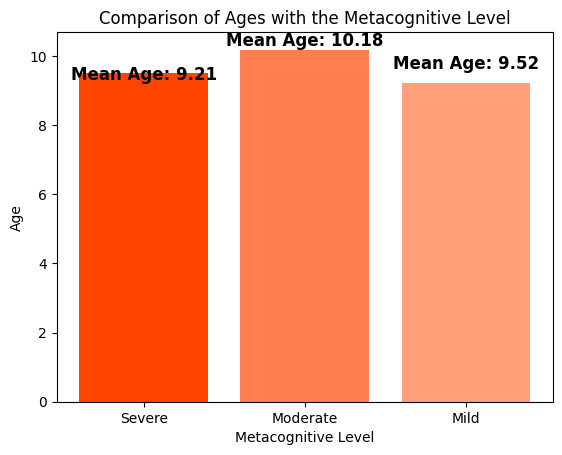

In [7]:
# Split the data into 3 groups
ml_severe = df[df['Metacognitive_Level'] == 'Severe']['Age']
ml_moderate = df[df['Metacognitive_Level'] == 'Moderate']['Age']
ml_mild = df[df['Metacognitive_Level'] == 'Mild']['Age']

# Create a bar plot with warm colors
plt.bar(['Severe', 'Moderate', 'Mild'],
        [ml_severe.mean(), ml_moderate.mean(), ml_mild.mean()],
        color=['#FF4500', '#FF7F50', '#FFA07A'])  # Warm colors: Orange-Red, Coral, Light Salmon

# Add labels to the bars
plt.text(0, ml_mild.mean(), f'Mean Age: {ml_mild.mean():.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
plt.text(1, ml_moderate.mean(), f'Mean Age: {ml_moderate.mean():.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
plt.text(2, ml_severe.mean(), f'Mean Age: {ml_severe.mean():.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Add labels and title
plt.xlabel('Metacognitive Level')
plt.ylabel('Age')
plt.title('Comparison of Ages with the Metacognitive Level')

# Show the plot
plt.show()


##**Dataset Overview**

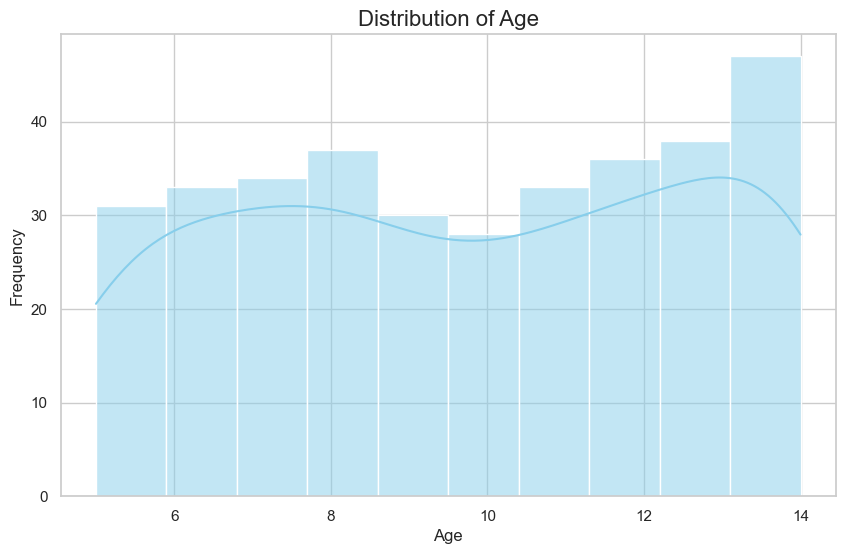

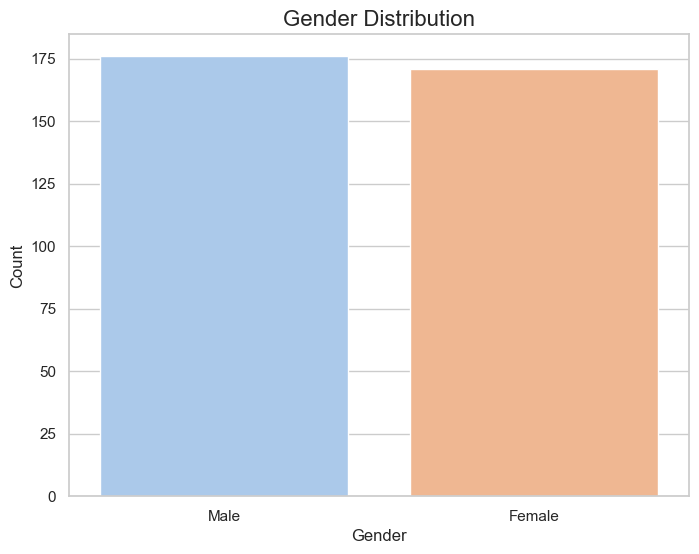

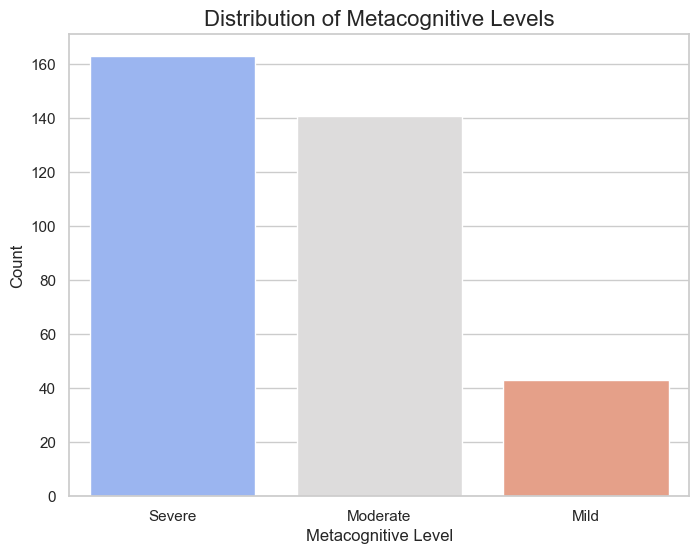

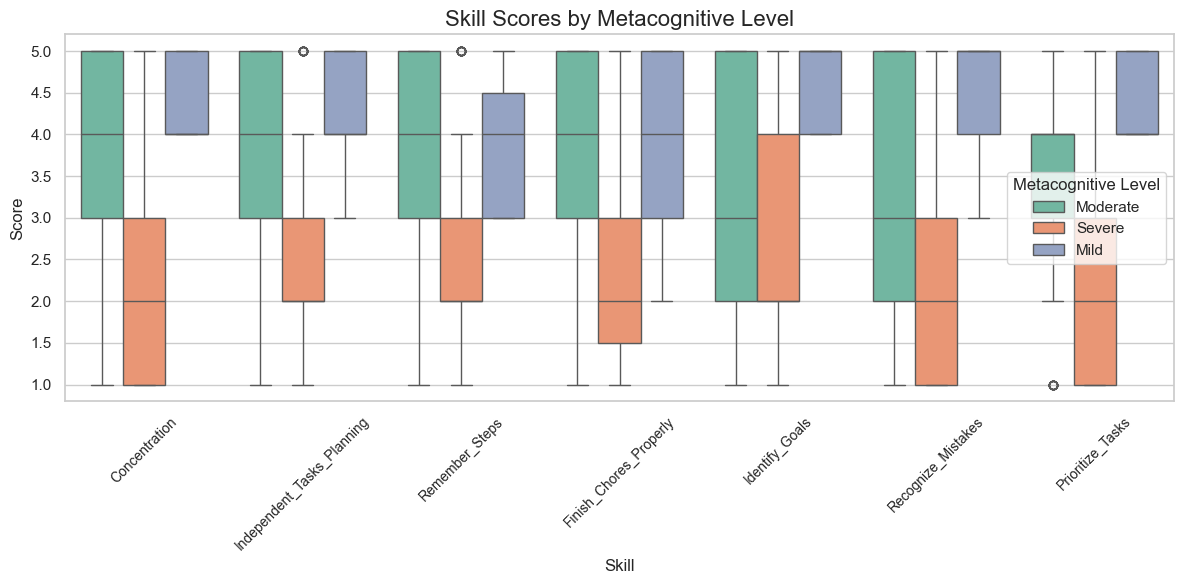

In [8]:
# Set style for visualizations
sns.set(style="whitegrid")

# 1. Distribution of Ages
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of Age", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()
print('\n\n')

# 2. Gender Distribution
plt.figure(figsize=(8, 6))
gender_counts = df['Gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="pastel", hue=gender_counts.index, dodge=False)
plt.title("Gender Distribution", fontsize=16)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend([], [], frameon=False)  # Remove legend since it duplicates the x-axis
plt.show()
print('\n\n')

# 3. Metacognitive Level Distribution
plt.figure(figsize=(8, 6))
level_counts = df['Metacognitive_Level'].value_counts()
sns.barplot(x=level_counts.index, y=level_counts.values, palette="coolwarm", hue=level_counts.index, dodge=False)
plt.title("Distribution of Metacognitive Levels", fontsize=16)
plt.xlabel("Metacognitive Level", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend([], [], frameon=False)  # Remove legend since it duplicates the x-axis
plt.show()
print('\n\n')

# 4. Skill Scores vs Metacognitive Levels
plt.figure(figsize=(12, 6))
skill_columns = [
    "Concentration",
    "Independent_Tasks_Planning",
    "Remember_Steps",
    "Finish_Chores_Properly",
    "Identify_Goals",
    "Recognize_Mistakes",
    "Prioritize_Tasks"
]
melted_skills = df.melt(id_vars=["Metacognitive_Level"], value_vars=skill_columns,
                             var_name="Skill", value_name="Score")
sns.boxplot(x="Skill", y="Score", hue="Metacognitive_Level", data=melted_skills, palette="Set2")
plt.xticks(rotation=45, fontsize=10)
plt.title("Skill Scores by Metacognitive Level", fontsize=16)
plt.xlabel("Skill", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.legend(title="Metacognitive Level")
plt.tight_layout()
plt.show()

# **Preprocessing**

##**Handle Missing values**

In [9]:
# Function to handle missing values
def handle_missing_values(df):
    for column in df:
        if df[column].dtype == 'object':
            df[column].fillna(df[column].mode()[0], inplace=True)
        else:
            df[column].fillna(df[column].median(), inplace=True)
    return df

df = handle_missing_values(df)

C:\Users\duudi\AppData\Local\Temp\ipykernel_10084\820986383.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
C:\Users\duudi\AppData\Local\Temp\ipykernel_10084\820986383.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

##**Encoding Labels**

In [10]:
# Define mappings for encoding
mappings = {
    'Gender': {'Male': 1, 'Female': 0},
    'Family_History': {'Yes': 1, 'No': 0},
    'Metacognitive_Level': {'Mild': 0, 'Moderate': 1, 'Severe': 2}
}

def apply_mapping_encoding(df, mappings):
    for column, mapping in mappings.items():
        if column in df.columns:
            df[column] = df[column].map(mapping)
    return df

df1 = apply_mapping_encoding(df, mappings)

# label_encoder = LabelEncoder()
# df['Metacognitive_Level'] = label_encoder.fit_transform(df['Metacognitive_Level'])



In [11]:
df1

,Gender,Age,Family_History,Concentration,Independent_Tasks_Planning,Remember_Steps,Finish_Chores_Properly,Identify_Goals,Recognize_Mistakes,Prioritize_Tasks,Metacognitive_Level
0,0,13,1,4,5,2,5,3,5,1,1
1,0,9,0,1,4,2,5,5,3,4,1
2,0,10,0,3,3,3,5,2,3,4,1
3,1,5,1,2,5,1,5,5,5,4,1
4,1,12,1,3,3,5,3,3,3,4,1
...,...,...,...,...,...,...,...,...,...,...,...
342,0,6,0,3,2,1,5,5,5,3,1
343,1,5,0,5,2,1,1,5,4,5,1
344,1,8,0,2,3,2,3,2,3,5,2
345,0,8,0,2,4,4,5,4,3,4,1


##**Correlation Matrix**

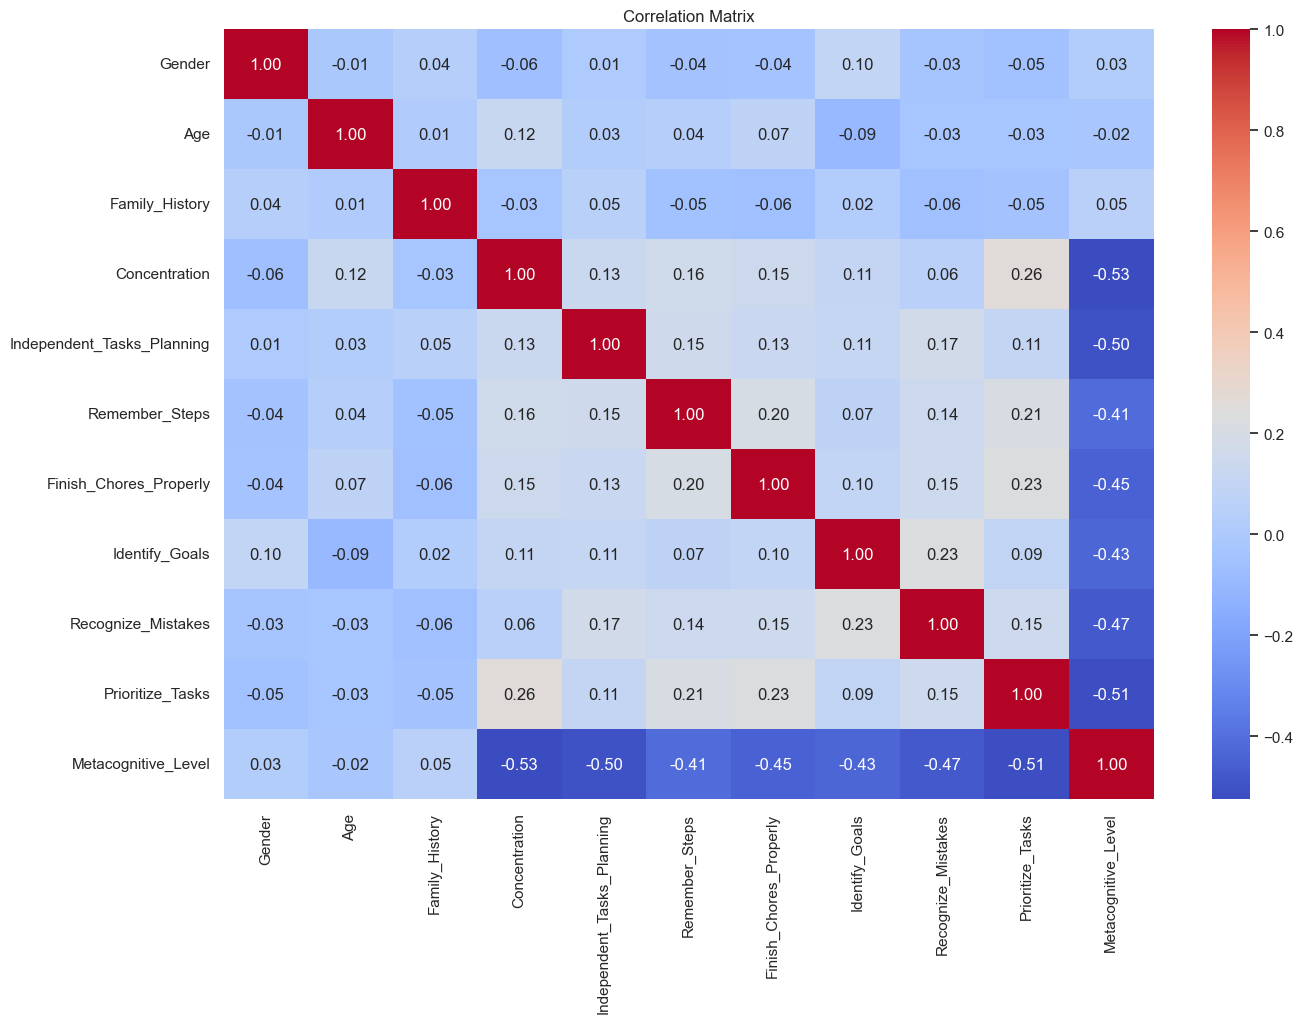

In [12]:
# Correlation Matrix
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

##**Outliers**

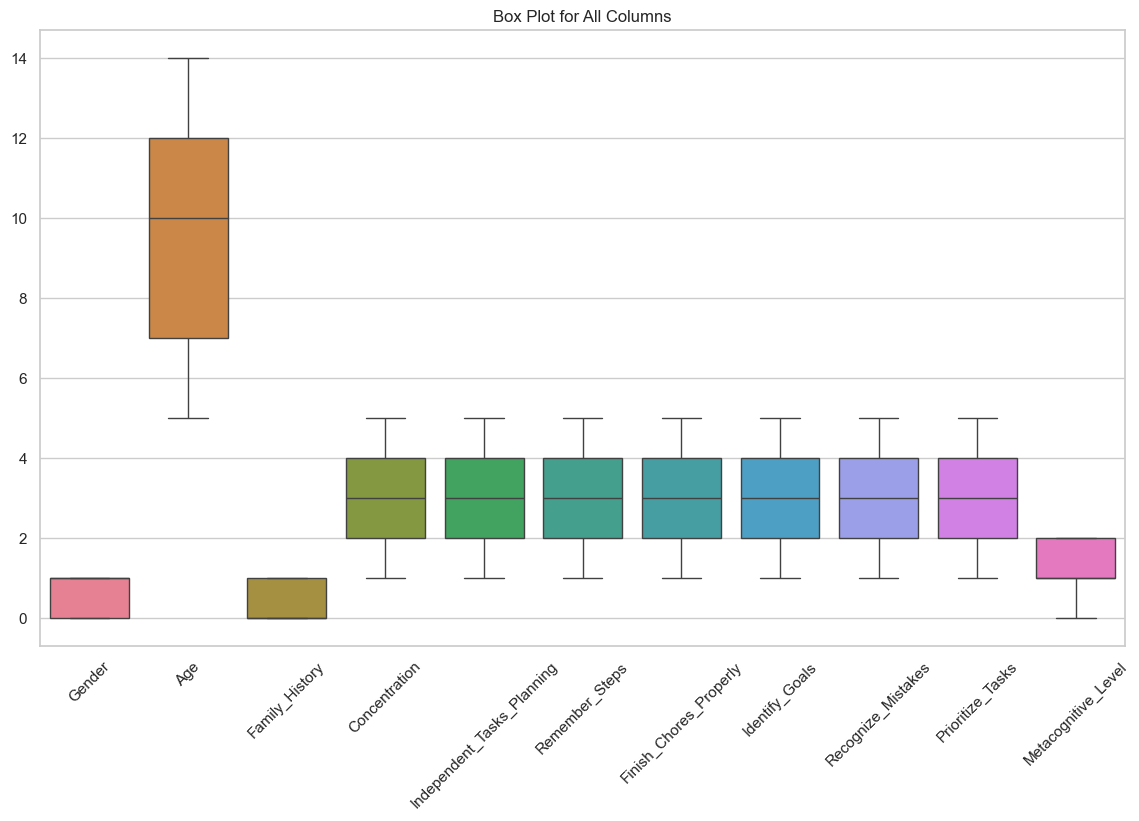

In [13]:
# Box Plot for Outliers
plt.figure(figsize=(14, 8))
sns.boxplot(data=df)
plt.title('Box Plot for All Columns')
plt.xticks(rotation=45)
plt.show()

In [14]:
# Drop highly correlated columns
def drop_highly_correlated_columns(df, threshold=0.7):
    correlation_matrix = df.corr()
    drop_columns = [
        col
        for i in range(len(correlation_matrix.columns))
        for j in range(i)
        if abs(correlation_matrix.iloc[i, j]) > threshold
    ]
    return df.drop(columns=set(drop_columns))

df2 = drop_highly_correlated_columns(df1)


In [15]:
df2

,Gender,Age,Family_History,Concentration,Independent_Tasks_Planning,Remember_Steps,Finish_Chores_Properly,Identify_Goals,Recognize_Mistakes,Prioritize_Tasks,Metacognitive_Level
0,0,13,1,4,5,2,5,3,5,1,1
1,0,9,0,1,4,2,5,5,3,4,1
2,0,10,0,3,3,3,5,2,3,4,1
3,1,5,1,2,5,1,5,5,5,4,1
4,1,12,1,3,3,5,3,3,3,4,1
...,...,...,...,...,...,...,...,...,...,...,...
342,0,6,0,3,2,1,5,5,5,3,1
343,1,5,0,5,2,1,1,5,4,5,1
344,1,8,0,2,3,2,3,2,3,5,2
345,0,8,0,2,4,4,5,4,3,4,1


##**Spliting Data**

In [16]:
#assuming X and y are features and target variable
X = df2.iloc[:,:-1].values
y = df2['Metacognitive_Level']

In [17]:
X

array([[ 0, 13,  1, ...,  3,  5,  1],
       [ 0,  9,  0, ...,  5,  3,  4],
       [ 0, 10,  0, ...,  2,  3,  4],
       ...,
       [ 1,  8,  0, ...,  2,  3,  5],
       [ 0,  8,  0, ...,  4,  3,  4],
       [ 1, 11,  0, ...,  2,  5,  3]], dtype=int64)

In [18]:
data_size = len(X)

In [19]:
# #calculate split indices
# train_size = int(0.6 * data_size)
# # val_size = int(0.15 * data_size)
# test_size = data_size - train_size - val_size

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
#display sizes
print(f"Train size: {len(X_train)}")
# print(f"Validation size: {len(X_val)}")
print(f"Test size: {len(X_test)}")

Train size: 277
Test size: 70


##**Balancing the dataset**

In [22]:
# #apply SMOTE to balance the training data
# # smote = SMOTE(random_state=42)
# # X_train_new, y_train_new = smote.fit_resample(X_train, y_train)

# # n_samples = 500
# # X_train_smote, y_train_smote = resample(
# #     X_train_new, y_train_new, n_samples=n_samples, random_state=42, replace=True
# # )

# #output the sizes of the datasets
# print(f"Train size: {len(X_train_smote)}")
# # print(f"Validation size: {len(X_val)}")
# print(f"Test size: {len(X_test)}")
# print('\nClass Distribution')

# #display class distribution after balancing
# print(pd.Series(y_train_smote).value_counts())

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(f"Train size: {len(X_train_smote)}")
print(f"Test size: {len(X_test)}")

Train size: 390
Test size: 70


##**Data Normalization**

In [23]:
# # scaler = StandardScaler()
# # X_train_scaled = scaler.fit_transform(X_train_smote)
# # # X_val_scaled = scaler.transform(X_val)
# # X_test_scaled = scaler.transform(X_test)

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_smote)
# # X_test_scaled = scaler.transform(X_test)

In [24]:
# X_train_scaled

In [25]:
# Hyperparameter Tuning with GridSearchCV
results = {}

#**Model Training**

##**1. Extreme Gradient Boosting (XGBoost)**

In [26]:
xgb_params = {
    'max_depth': 10,  # Increase tree depth for better feature interactions
    'learning_rate': 0.001,  # Reduce learning rate for more precise updates
    'n_estimators': 100,  # Increase number of boosting rounds
    'subsample': 0.9,  # Introduce more randomness
    'colsample_bytree': 0.9,  # Slightly increase feature sampling
    'min_child_weight': 2  # Reduce this to allow more splits
}

# Initialize the XGBoost model with improved parameters
xgb_best = XGBClassifier(
    random_state=42,
    eval_metric='mlogloss',
    **xgb_params
)

xgb_best.fit(X_train_smote, y_train_smote)

xgb_test_preds = xgb_best.predict(X_test)

results['XGBoost'] = {
    'model': xgb_best,
    'classification_report': classification_report(y_test, xgb_test_preds, output_dict=True)
}


In [27]:
# Classification report
print("XGB Classification Report:")
print(classification_report(y_test, xgb_test_preds))

XGB Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.90      0.93      0.91        28
           2       0.97      0.91      0.94        33

    accuracy                           0.93        70
   macro avg       0.92      0.95      0.93        70
weighted avg       0.93      0.93      0.93        70



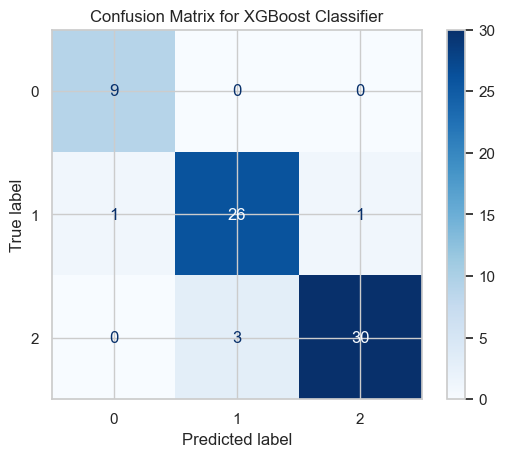

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
xgb_conf_matrix = confusion_matrix(y_test, xgb_test_preds)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=xgb_conf_matrix, display_labels=xgb_best.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for XGBoost Classifier")
plt.show()


In [29]:
# Save XGBoost model
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_best, f)

##**2. Multi-Layer Perceptron (MLP)**

In [30]:
mlp_params = {
    'hidden_layer_sizes': (150, 75),  # Add another layer for better representation
    'learning_rate_init': 0.005,  # Lower learning rate for finer convergence
    'alpha': 0.00005,  # Further reduce L2 regularization
    'max_iter': 900,  # Allow more training iterations
    'early_stopping': True,  # Stop if validation accuracy stagnates
    'n_iter_no_change': 20  # Allow slightly longer patience for stopping
}

mlp = MLPClassifier(random_state=42, **mlp_params)
mlp.fit(X_train_smote, y_train_smote)

mlp_test_preds = mlp.predict(X_test)

results['MLP'] = {
    'model': mlp,
    'classification_report': classification_report(y_test, mlp_test_preds, output_dict=True)
}


In [31]:
# Print the classification report
print("MLP Classification Report:")
print(classification_report(y_test, mlp_test_preds))

MLP Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         9
           1       0.79      0.82      0.81        28
           2       0.93      0.82      0.87        33

    accuracy                           0.84        70
   macro avg       0.82      0.88      0.85        70
weighted avg       0.85      0.84      0.84        70



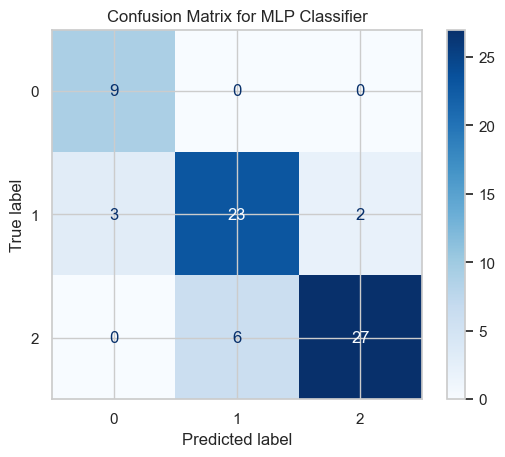

In [32]:
# Compute the confusion matrix
mlp_conf_matrix = confusion_matrix(y_test, mlp_test_preds)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=mlp_conf_matrix, display_labels=mlp.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for MLP Classifier")
plt.show()


In [33]:
# Save MLP model
with open('mlp_model.pkl', 'wb') as f:
    pickle.dump(mlp, f)

##**3. Quadratic Discriminant Analysis (QDA)**

In [34]:
qda = QuadraticDiscriminantAnalysis(reg_param=0.1)  # Further reduce regularization to balance bias and variance
qda.fit(X_train_smote, y_train_smote)

qda_test_preds = qda.predict(X_test)

results['QDA'] = {
    'model': qda,
    'classification_report': classification_report(y_test, qda_test_preds, output_dict=True)
}


In [35]:
# Print the classification report
print("QDA Classification Report:")
print(classification_report(y_test, qda_test_preds))

QDA Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.89      0.94        28
           2       0.97      1.00      0.99        33

    accuracy                           0.96        70
   macro avg       0.93      0.96      0.94        70
weighted avg       0.96      0.96      0.96        70



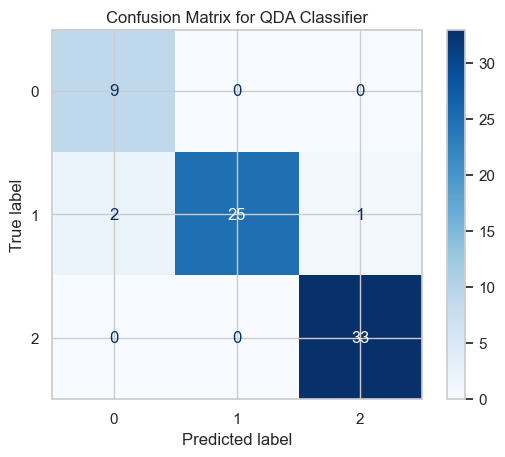

In [36]:
# Compute the confusion matrix
qda_conf_matrix = confusion_matrix(y_test, qda_test_preds)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=qda_conf_matrix, display_labels=qda.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for QDA Classifier")
plt.show()

In [37]:
# Save QDA model
with open('qda_model.pkl', 'wb') as f:
    pickle.dump(qda, f)

##**4. Support Vector Machine (SVM)**

In [38]:
svm = SVC(C=3,  # Increase penalty parameter to reduce misclassifications
          gamma=0.05,  # Reduce gamma for a smoother decision boundary
          kernel='linear',  # Use linear kernel for better interpretability
          class_weight={0: 2, 1: 4},  # Adjust weights for class imbalance
          random_state=50)

# Train the model on the training data
svm.fit(X_train_smote, y_train_smote)

# Make predictions on the test data
svm_test_preds = svm.predict(X_test)

# Store the results in the results dictionary
results['SVM'] = {
    'model': svm,
    'classification_report': classification_report(y_test, svm_test_preds, output_dict=True)
}

In [39]:
# Print the classification report
print("SVM Classification Report:")
print(classification_report(y_test, svm_test_preds))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.89      0.67         9
           1       0.87      0.71      0.78        28
           2       0.97      0.94      0.95        33

    accuracy                           0.84        70
   macro avg       0.79      0.85      0.80        70
weighted avg       0.87      0.84      0.85        70



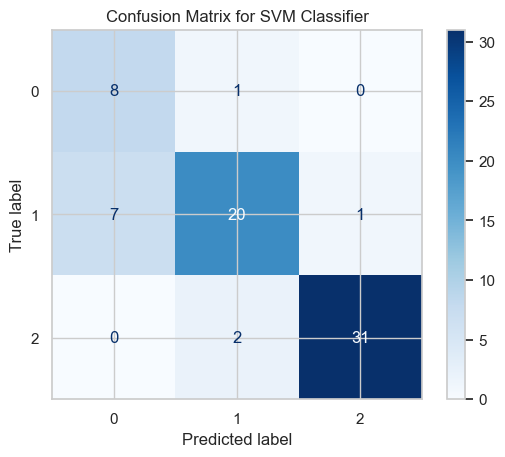

In [40]:
# Compute the confusion matrix
svm_conf_matrix = confusion_matrix(y_test, svm_test_preds)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=svm_conf_matrix, display_labels=svm.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for SVM Classifier")
plt.show()

In [41]:
# Save QDA model
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm, f)

##**Visualize the Train-Test-Validate Accuracies**

In [42]:
model_names = list(results.keys())  # Get model names from the keys of the results dictionary

# Initialize an empty list to store model metrics
model_metrics = []

# Loop through the models and calculate metrics for the training, validation, and test sets
for model_name in model_names:
    model = results[model_name]['model']  # Access the model

    # Make predictions on training, validation, and test sets
    train_preds = model.predict(X_train_smote)
    # val_preds = model.predict(X_val_smote)
    test_preds = model.predict(X_test)

    # Calculate accuracies for training, validation, and test sets
    train_accuracy = accuracy_score(y_train_smote, train_preds)
    # val_accuracy = accuracy_score(y_val, val_preds)
    test_accuracy = accuracy_score(y_test, test_preds)

    # Get classification report for the test set
    test_report = classification_report(y_test, test_preds, output_dict=True)

    # Extract overall precision, recall, and F1 score (weighted average)
    model_metrics.append({
        'Model': model_name,
        'Train Accuracy': train_accuracy,
        # 'Validation Accuracy': val_accuracy,
        'Test Accuracy': test_accuracy,
        'Precision': test_report['weighted avg']['precision'],
        'Recall': test_report['weighted avg']['recall'],
        'F1 Score': test_report['weighted avg']['f1-score']
    })

# Convert the list of metrics to a DataFrame
metrics_df = pd.DataFrame(model_metrics)

# Display the summary table
print(metrics_df)
print('\n\n\n')


     Model  Train Accuracy  Test Accuracy  Precision    Recall  F1 Score
0  XGBoost        0.989744       0.928571   0.930556  0.928571  0.928681
1      MLP        0.884615       0.842857   0.852586  0.842857  0.843610
2      QDA        0.969231       0.957143   0.962758  0.957143  0.957465
3      SVM        0.943590       0.842857   0.873094  0.842857  0.849110






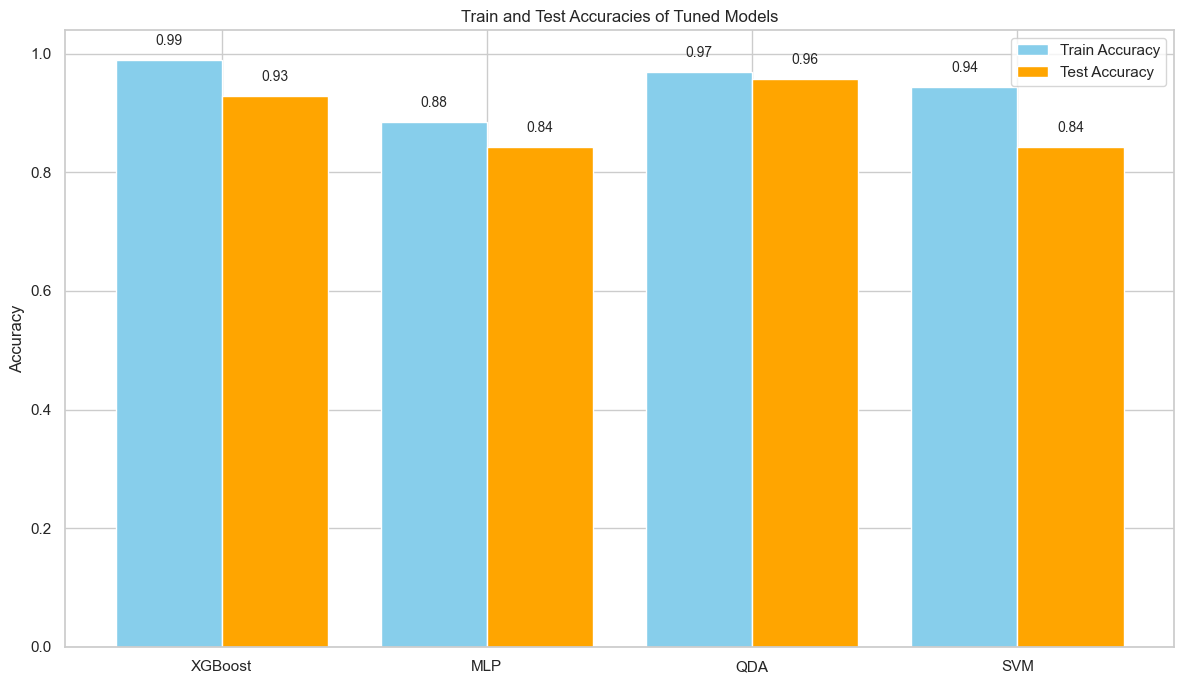

In [43]:
model_names = list(results.keys())

# Calculate train and test accuracies
train_accuracies = [accuracy_score(y_train_smote, results[model]['model'].predict(X_train_smote)) for model in model_names]
test_accuracies = [accuracy_score(y_test, results[model]['model'].predict(X_test)) for model in model_names]

# Plotting the results
plt.figure(figsize=(12, 7))

# Bar width for grouped bars
bar_width = 0.4
x = np.arange(len(model_names))

# Create bars for train and test accuracies
train_bars = plt.bar(x - bar_width / 2, train_accuracies, width=bar_width, color='skyblue', label='Train Accuracy')
test_bars = plt.bar(x + bar_width / 2, test_accuracies, width=bar_width, color='orange', label='Test Accuracy')

# Add accuracy labels on top of each bar
for bar, accuracy in zip(train_bars, train_accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02,
             f'{accuracy:.2f}', ha='center', va='bottom', fontsize=10)

for bar, accuracy in zip(test_bars, test_accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02,
             f'{accuracy:.2f}', ha='center', va='bottom', fontsize=10)

# Labeling the plot
plt.xticks(x, model_names)
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracies of Tuned Models')
plt.legend()
plt.tight_layout()
plt.show()


##**Best Model Selection**

In [44]:
# Find the index of the best model
best_model_index = test_accuracies.index(max(test_accuracies))
best_model_name = model_names[best_model_index]
best_model_accuracy = test_accuracies[best_model_index]

# Print the best model and its accuracy
print(f"The best model is '{best_model_name}' with a test accuracy of {best_model_accuracy:.2f}.")


The best model is 'QDA' with a test accuracy of 0.96.


#**Recommendation System**

In [45]:
def recommend_activities(age, Metacognitive_Level, user_input):
    # Define activity recommendations based on age and metacognitive level, focusing on developing metacognitive skills
    activity_recommendations = {
        0: {  # Mild Level Activities
            '5_to_8': [
                "Play matching card games to improve memory and focus.",
                "Practice mindfulness exercises like breathing or focusing on sounds.",
                "Use visual schedules to break down daily tasks step by step.",
            ],
            '9_to_11': [
                "Create a simple task list with pictures to help organize daily chores.",
                "Play simple board games or puzzles to improve planning and recall.",
                "Practice memory games that require following steps to complete tasks."
            ],
            '12_to_14': [
                "Practice completing chores independently with a visual checklist.",
                "Work on puzzles that involve following a sequence of steps.",
                "Engage in short, focus-based learning tasks to improve task completion."
            ]
        },
        1: {  # Moderate Level Activities
            '5_to_8': [
                "Create step-by-step checklists for tasks like getting dressed or cleaning up.",
                "Practice recognizing and discussing feelings with simple role-play exercises.",
                "Work on simple puzzles that require sequential thinking and problem-solving."
            ],
            '9_to_11': [
                "Use role-play to practice recognizing mistakes and discussing what can be improved.",
                "Organize chores into smaller tasks and track progress.",
                "Set simple goals and break them down into smaller, achievable steps."
            ],
            '12_to_14': [
                "Use guided discussions to set and identify personal goals for the future.",
                "Work on problem-solving puzzles that require recognizing patterns and strategies.",
                "Practice organizing tasks by priority with a simple list or visual chart."
            ]
        },
        2: {  # Severe Level Activities
            '5_to_8': [
                "Work one-on-one with a coach to break down tasks into simple steps.",
                "Practice social skills through role-play exercises that focus on recognition of mistakes.",
                "Engage in short, focused activities like simple puzzles or memory games."
            ],
            '9_to_11': [
                "Use visual aids and cues to improve social interaction and task completion.",
                "Practice memory games where steps must be recalled in order.",
                "Provide immediate feedback during tasks to reinforce step completion."
            ],
            '12_to_14': [
                "Gradually introduce tasks with multiple steps and provide clear instructions.",
                "Practice task prioritization with simple guidance, like a checklist or reminder.",
                "Work on task prioritization without external help by using visual aids and reminders."
            ]
        }
    }

    # Determine the appropriate age group
    if 5 <= age <= 8:
        age_group = '5_to_8'
    elif 9 <= age <= 11:
        age_group = '9_to_11'
    else:  # For ages 12 to 14
        age_group = '12_to_14'

    # Select the activities based on age and metacognitive level
    if Metacognitive_Level in activity_recommendations:
        selected_activities = activity_recommendations[Metacognitive_Level].get(age_group, [])
    else:
        return []  # Return an empty list if no matching activities are found

    return selected_activities


In [46]:
# Step 1: Prepare user input with all 11 features
user_input = {
    'Gender': 1,  # male-1, female-0
    'Age': 14,
    'Family_History': 0,  # yes-1, no-0
    'Concentration': 4,
    'Individual_Tasks_Planning': 2,
    'Remember_Steps': 4,
    'Finish_Chores_Properly': 3,
    'Identify_Goals': 2,
    'Recognize_Mistakes': 2,
    'Prioritize_Tasks': 1
}

# Step 2: Create the input vector with all 11 features (match the feature order of X_train_balanced)
input_features = [
    user_input['Age'],
    user_input['Gender'],
    user_input['Family_History'],
    user_input['Concentration'],
    user_input['Individual_Tasks_Planning'],
    user_input['Remember_Steps'],
    user_input['Finish_Chores_Properly'],
    user_input['Identify_Goals'],
    user_input['Recognize_Mistakes'],
    user_input['Prioritize_Tasks']
]

# Step 3: Predict the Metacognitive Level using QDA model
predicted_metacognitive_level = qda.predict([input_features])[0]

if predicted_metacognitive_level == 0:
    print("Metacognitive Level: Mild")
elif predicted_metacognitive_level == 1:
    print("Metacognitive Level: Moderate")
elif predicted_metacognitive_level == 2:
    print("Metacognitive Level: Severe")

# Step 4: Get activity recommendations based on predicted metacognitive level and age
recommended_activities = recommend_activities(user_input['Age'], predicted_metacognitive_level, user_input)

# Step 5: Output the results
print("\nRecommended Activities:")
for activity in recommended_activities:
    print(f"- {activity}")


Metacognitive Level: Severe

Recommended Activities:
- Gradually introduce tasks with multiple steps and provide clear instructions.
- Practice task prioritization with simple guidance, like a checklist or reminder.
- Work on task prioritization without external help by using visual aids and reminders.


# **Input user data**

###**Defining user inputs**

In [47]:
def collect_user_input():
    def get_valid_age():
        while True:
            try:
                age = int(input("Enter Age (5 or older): "))
                if age >= 5:
                    return age
                else:
                    print("Age must be 5 or older. Please try again.")
            except ValueError:
                print("Invalid input. Please enter a valid number for age.")

    def get_valid_rating(prompt):
        while True:
            try:
                rating = int(input(f"{prompt} (1-5): "))
                if 1 <= rating <= 5:
                    return rating
                else:
                    print("Rating must be between 1 and 5. Please try again.")
            except ValueError:
                print("Invalid input. Please enter a valid number between 1 and 5.")

    # Collect user input
    return {
        'Age': get_valid_age(),
        'Gender': input("Enter Gender (M/F): ").strip().upper(),
        'Family_History': input("Any family member with autism? (yes/no): ").strip().lower(),
        'Concentration': get_valid_rating("Rate Concentration"),
        'Individual_Tasks_Planning': get_valid_rating("Rate Individual Tasks Planning"),
        'Remember_Steps': get_valid_rating("Rate Remembering Steps"),
        'Finish_Chores_Properly': get_valid_rating("Rate Finishing Chores Properly"),
        'Identify_Goals': get_valid_rating("Rate Can Identifying Goals"),
        'Recognize_Mistakes': get_valid_rating("Rate Can Recognizing Mistakes"),
        'Prioritize_Tasks': get_valid_rating("Rate Prioritizing Tasks")
    }


### **Preprocess Input**

In [48]:
# Function to preprocess the input
def preprocess_input(user_input):
    # Transform the user input into a suitable format for prediction
    user_input['Gender'] = 1 if user_input['Gender'].lower() == 'M' else 0
    user_input['Family_History'] = 1 if user_input['Family_History'].lower() == 'yes' else 0

    # Example preprocessing: convert to DataFrame (if using pandas)
    return pd.DataFrame([user_input])

### **Provide Recommendations**

In [49]:
# Collect user input
user_input = collect_user_input()

# Preprocess the user input (convert to the correct format for prediction)
preprocessed_input = preprocess_input(user_input).values

# Use the trained QDA model to predict the Metacognitive Level
predicted_metacognitive_level = qda.predict(preprocessed_input)[0]  # Predict the level for the input

# Provide activity recommendations based on the predicted Metacognitive Level
recommended_activities = recommend_activities(user_input['Age'],predicted_metacognitive_level, user_input)

# Output the predicted level and recommended activities
if predicted_metacognitive_level == 0:
    print("\nMetacognitive Level: Mild")
elif predicted_metacognitive_level == 1:
    print("\nMetacognitive Level: Moderate")
elif predicted_metacognitive_level == 2:
    print("\nMetacognitive Level: Severe")

    print("\nRecommended Activities:")
for activity in recommended_activities:
    print(f"- {activity}")



Metacognitive Level: Severe

Recommended Activities:
- Use visual aids and cues to improve social interaction and task completion.
- Practice memory games where steps must be recalled in order.
- Provide immediate feedback during tasks to reinforce step completion.
